In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_selection import VarianceThreshold

## Загрузка и предварительная обработка данных

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Kaggle/House Prices/train.csv')
print('Размеры треноровочного датасета: {}'.format(train_data.shape))
print()
display(train_data.head(3))


Размеры треноровочного датасета: (1460, 81)



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/Kaggle/House Prices/test.csv')
print('Размеры тестового датасета: {}'.format(test_data.shape))
print()
display(test_data.head(3))

Размеры тестового датасета: (1459, 80)



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


Датасет содержит 80 признаков. В дальнейшем, потребуется удалить малоинформативные признаки.

Первоначально, предлагается сделать поверхностный обзор данных - имеющиеся типы, пропущенные значения, количество уникальных значений.

In [ ]:
# В тестовый датасет необходимо добавить колонку "SalePrice".
## Это нужно для того, чтобы уровнять количество признаков.

test_data['SalePrice'] = 'test_data'

In [ ]:
# Создаем таблицу по аналогии с выводом pandas.info().

null_values_train = (train_data.isnull().sum().values / train_data.shape[0] * 100).round(1)
null_values_test = (test_data.isnull().sum().values / test_data.shape[0] * 100).round(1)
types = [str(i) for i in train_data.dtypes.values]
features = train_data.columns
modes = [train_data[col].mode()[0] for col in features]
unique_values = [train_data[col].nunique() for col in features]

data_info = pd.DataFrame({'columns': features, 'isNull(%)': null_values_train, 
                          'isNull(%)_TEST': null_values_test, 'type': types, 
                          'mode': modes, 'n_unique': unique_values})


#### **Вывод таблицы с основной информацией**

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(data_info.sort_values('isNull(%)', ascending = False))

,columns,isNull(%),isNull(%)_TEST,type,mode,n_unique
72,PoolQC,99.5,99.8,object,Gd,3
74,MiscFeature,96.3,96.5,object,Shed,4
6,Alley,93.8,92.7,object,Grvl,2
73,Fence,80.8,80.1,object,MnPrv,4
57,FireplaceQu,47.3,50.0,object,Gd,5
3,LotFrontage,17.7,15.6,float64,60.0,110
59,GarageYrBlt,5.5,5.3,float64,2005.0,97
64,GarageCond,5.5,5.3,object,TA,5
58,GarageType,5.5,5.2,object,Attchd,6
60,GarageFinish,5.5,5.3,object,Unf,3


### Удаление "очевидных" лишних признаков

На текущем этапе, есть возможность удалить некоторые признаки, используя информацию о пропущенных данных.

In [ ]:
# Создаем список в который будут помещены признаки для удаления.
## В первую очередь, в список добавим признаки, по которым имеется боле 50% пропущенных значений.

col_to_drop = ['Id']
col_to_drop += data_info.sort_values('isNull(%)', ascending = False)['columns'].to_list()[:5]
data_info = data_info[~data_info['columns'].isin(col_to_drop)]

In [ ]:
# Для дальнейшей работы создадим объединенный датасет.

houses_df = train_data.append(test_data)

#### Числовые данные

Следующим шагом предлагается обработать признаки, содержащие числовые значения. Удалим данные с низкой дисперсией, а также, имеющие к-т корреляции с целевой переменной ниже 0.1 

In [ ]:
numeric_features = houses_df[data_info[data_info['type'].isin(['int64', 'float64'])]['columns']]
numeric_features = numeric_features.drop('SalePrice', axis = 1)

In [ ]:
# Признаки с низкой дисперсией.

sel = VarianceThreshold(0.2)
sel.fit_transform(numeric_features)
col_to_drop += numeric_features.columns[~sel.get_support()].to_list()

In [ ]:
# Удаляем выбранные признаки из таблицы data_info.

data_info = data_info[~data_info['columns'].isin(col_to_drop)]
numeric_features = train_data[data_info[data_info['type'].isin(['int64', 'float64'])]['columns'][1:]]

In [ ]:
numeric_features.head(3)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500


In [ ]:
# Применяем к-т корреляции Спирмена.

numeric_features.dropna(inplace = True)
corr = numeric_features.corr(method = 'spearman')
corr_df = pd.DataFrame(corr['SalePrice']).reset_index()
corr_df['SalePrice'] = abs(corr_df['SalePrice'])
col_to_drop += corr_df.query('SalePrice<0.1')['index'].to_list()

In [ ]:
col_to_drop

['Id',
 'PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'FireplaceQu',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'BsmtFinSF2',
 'LowQualFinSF',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

#### Категориальные данные

 В первую очередь удалим те признаки, в которых преобладает одна какая-либо категория.

In [ ]:
# Список категориальных признаков.

object_features = data_info.query("type=='object'")['columns'].to_list()

In [ ]:
max_shares = []
for column in object_features:
  max_share = train_data[column].value_counts(normalize=True).max().round(2)
  max_share_test = test_data[column].value_counts(normalize=True).max().round(2)
  n_unique = data_info.query(f"columns=='{column}'")['n_unique'].values[0]
  max_shares.append([column, n_unique, max_share, max_share_test])

In [ ]:
shares_df = pd.DataFrame(max_shares, columns = ['feature', 'categories', 'max_share', 'max_share_test'])\
              .sort_values('max_share', ascending = False)

shares_df.query('max_share>0.85')

,feature,categories,max_share,max_share_test
1,Street,2,1.00,1.00
4,Utilities,2,1.00,1.00
9,Condition2,8,0.99,0.99
13,RoofMatl,8,0.98,0.99
25,Heating,6,0.98,0.99
34,GarageCond,5,0.96,0.96
6,LandSlope,3,0.95,0.96
33,GarageQual,5,0.95,0.94
30,Functional,7,0.93,0.93
27,CentralAir,2,0.93,0.93


In [ ]:
col_to_drop += shares_df.query('max_share>0.85')['feature'].to_list()
len(col_to_drop)

33

In [ ]:
# Обновляем данные в таблице и создаем новый список.

data_info = data_info[~data_info['columns'].isin(col_to_drop)]
object_features = data_info.query("type=='object'")['columns'].to_list()

Следующим шагом определим внутри каких признаков нет статистически значимых различий между категориями.

In [ ]:
p_values = []
for column in object_features:
  feature_data = train_data[[column, 'SalePrice']]
  values = feature_data.groupby(column)['SalePrice'].mean()
  var = np.var(values)
  differences = np.zeros((1, 1500)) 
  for i in range(0, 1500):
    feature_data['SalePrice_mixed'] = np.random.permutation(feature_data['SalePrice'])
    values = feature_data.groupby(column)['SalePrice_mixed'].mean()
    var_new = np.var(values)
    differences[0][i] = var_new 
  p_value = (differences >= var).sum() / 1500
  p_values.append([column, p_value])

In [ ]:
anova_df = pd.DataFrame(p_values, columns = ['feature', 'p_value'])\
             .sort_values('p_value', ascending = False)

anova_df 

,feature,p_value
6,RoofStyle,0.299333
2,LotConfig,0.214000
7,Exterior1st,0.123333
15,HeatingQC,0.112000
8,Exterior2nd,0.058667
11,Foundation,0.055333
1,LotShape,0.014667
19,SaleCondition,0.006000
5,HouseStyle,0.004667
17,GarageType,0.002000


In [ ]:
col_to_drop += anova_df.query('p_value>0.05')['feature'].to_list()
len(col_to_drop)

39

In [ ]:
data_info = data_info[~data_info['columns'].isin(col_to_drop)]
object_features = data_info.query("type=='object'")['columns'].to_list()

#### **Повторный вывод таблицы с основной информацией**

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(data_info.sort_values('isNull(%)', ascending = False))

,columns,isNull(%),isNull(%)_TEST,type,mode,n_unique
3,LotFrontage,17.7,15.6,float64,60.0,110
58,GarageType,5.5,5.2,object,Attchd,6
60,GarageFinish,5.5,5.3,object,Unf,3
59,GarageYrBlt,5.5,5.3,float64,2005.0,97
32,BsmtExposure,2.6,3.0,object,No,4
33,BsmtFinType1,2.5,2.9,object,Unf,6
30,BsmtQual,2.5,3.0,object,TA,4
25,MasVnrType,0.5,1.1,object,None,4
26,MasVnrArea,0.5,1.0,float64,0.0,327
50,HalfBath,0.0,0.0,int64,0,3


### Обработка пропущенных значений

In [ ]:
houses_df_short = houses_df[data_info['columns']]

In [ ]:
houses_df_short.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,CollgCr,1Fam,2Story,7,5,...,2003.0,RFn,2.0,548.0,0,61,0,0,Normal,208500
1,20,RL,80.0,9600,Reg,Veenker,1Fam,1Story,6,8,...,1976.0,RFn,2.0,460.0,298,0,0,0,Normal,181500
2,60,RL,68.0,11250,IR1,CollgCr,1Fam,2Story,7,5,...,2001.0,RFn,2.0,608.0,0,42,0,0,Normal,223500
3,70,RL,60.0,9550,IR1,Crawfor,1Fam,2Story,7,5,...,1998.0,Unf,3.0,642.0,0,35,272,0,Abnorml,140000
4,60,RL,84.0,14260,IR1,NoRidge,1Fam,2Story,8,5,...,2000.0,RFn,3.0,836.0,192,84,0,0,Normal,250000


In [ ]:
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

In [ ]:
columns_with_omissions = data_info[(data_info['isNull(%)'] != 0) | 
                         (data_info['isNull(%)_TEST'] != 0)]['columns'].to_list()

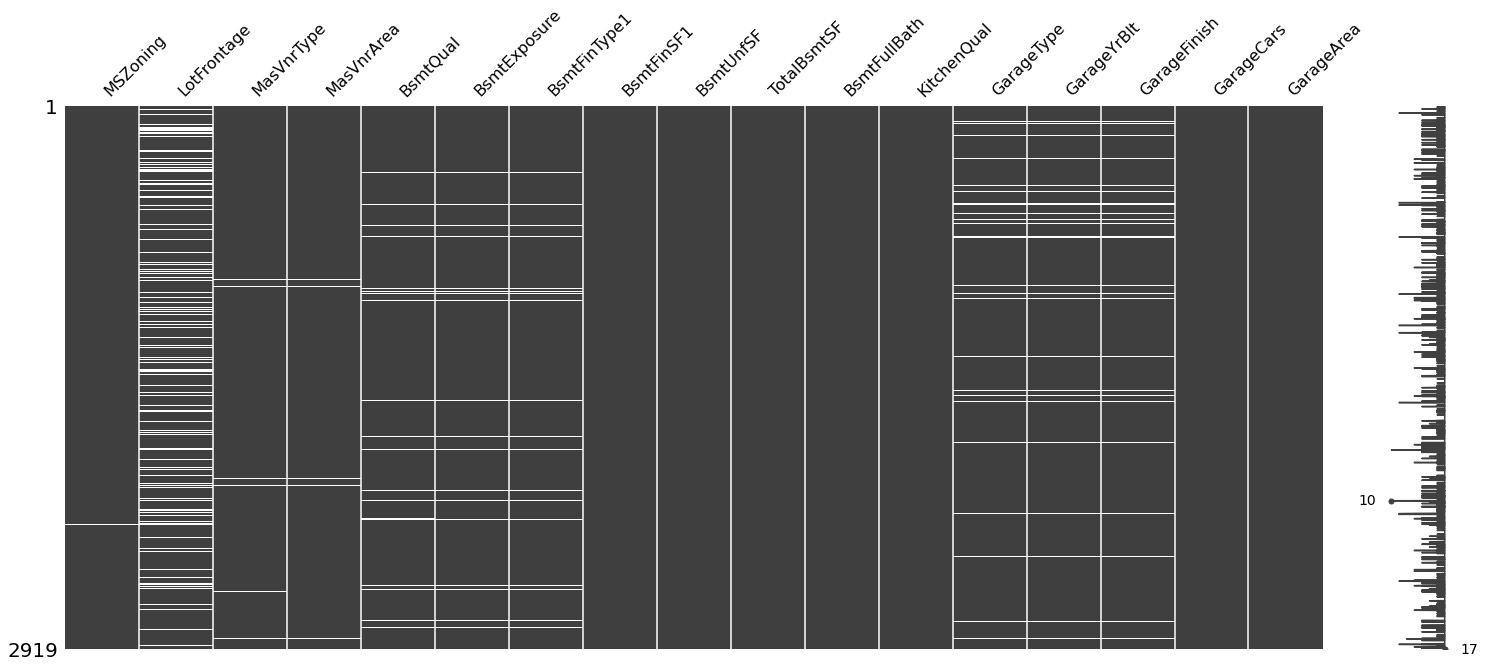

In [ ]:
msno.matrix(houses_df_short[columns_with_omissions])
plt.show()

In [ ]:
numeric_features = data_info.query("type!='object'")['columns'].to_list()[:-1]

In [ ]:
imputer = KNNImputer(n_neighbors=5)
houses_df_short[numeric_features] = imputer.fit_transform(houses_df_short[numeric_features])

In [ ]:
s_imputer = SimpleImputer(strategy = 'most_frequent')
s_imputer.fit(houses_df_short[object_features])
houses_df_short[object_features] = s_imputer.fit_transform(houses_df_short[object_features])

### Финальная обработка

На завершающем этапе проверим корреляции признаков между собой с целью дополнительно сократить количество параметров.

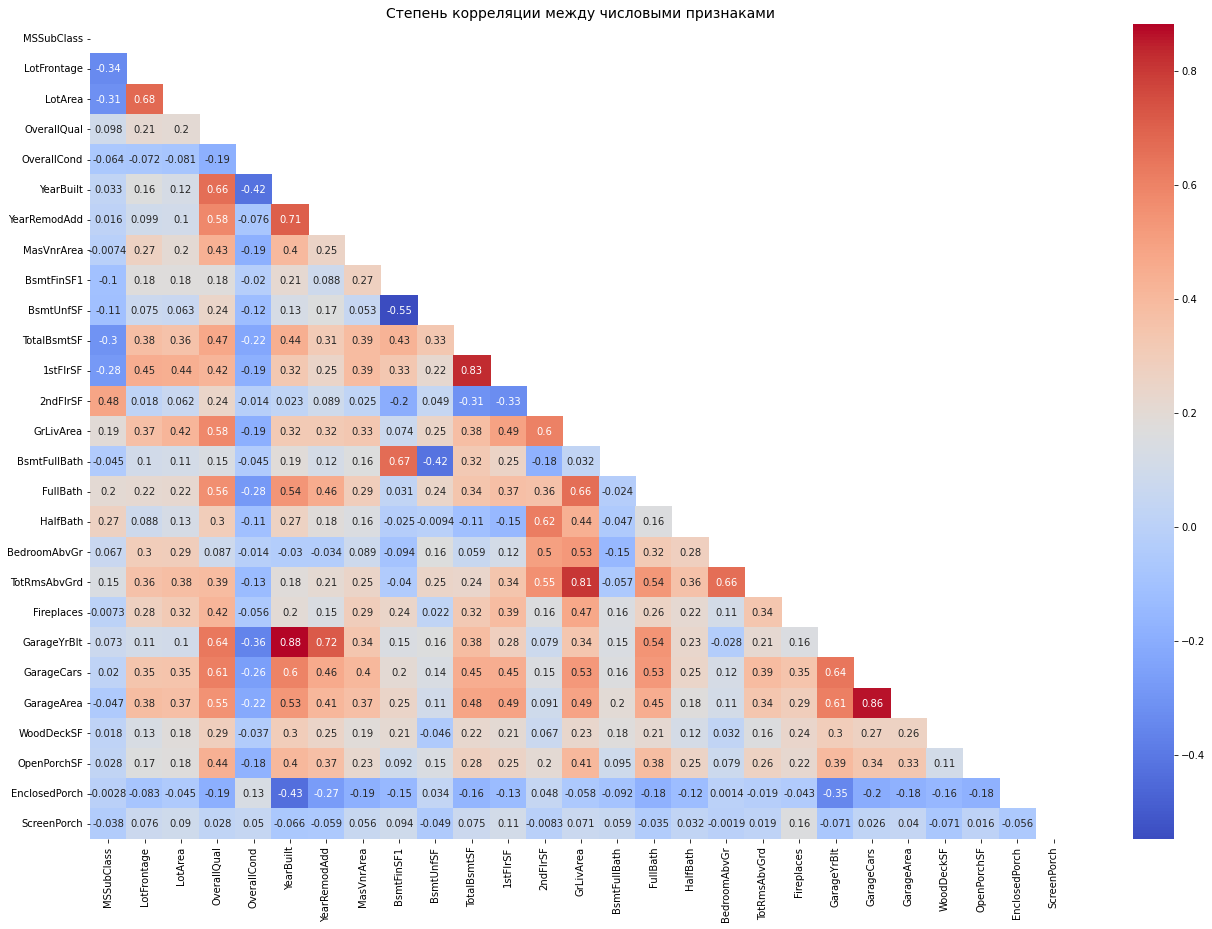

In [ ]:
plt.figure(figsize = (22, 15))
all_features = houses_df_short[numeric_features]
matrix = np.triu(all_features.corr())
sns.heatmap(all_features.corr(method='spearman'), annot = True, mask = matrix, cmap = 'coolwarm')
plt.title('Степень корреляции между числовыми признаками', fontsize = 14)
plt.show()

In [ ]:
features_list = all_features.corr(method='spearman').index.to_list()

In [ ]:
features_corrs = []
i = 0
for feature_1 in features_list:
  i += 1
  for feature_2 in features_list[i:]:
    corr = all_features.corr(method='spearman').loc[feature_1, feature_2]
    if abs(corr) > 0.7:
      f1_sales_corr = corr_df.query(f"index=='{feature_1}'")['SalePrice'].values[0]
      f2_sales_corr = corr_df.query(f"index=='{feature_2}'")['SalePrice'].values[0]
      features_corrs.append([feature_1, feature_2, round(corr, 2), 
                             f1_sales_corr, f2_sales_corr])   

In [ ]:
pd.DataFrame(features_corrs).sort_values(2, ascending = False)

,0,1,2,3,4
1,YearBuilt,GarageYrBlt,0.88,0.670198,0.626219
5,GarageCars,GarageArea,0.86,0.668072,0.631303
3,TotalBsmtSF,1stFlrSF,0.83,0.618298,0.582930
4,GrLivArea,TotRmsAbvGrd,0.81,0.724977,0.538406
2,YearRemodAdd,GarageYrBlt,0.72,0.617311,0.626219
0,YearBuilt,YearRemodAdd,0.71,0.670198,0.617311


In [ ]:
additionally_delete = ['GarageYrBlt', 'GarageArea', '1stFlrSF', 'TotRmsAbvGrd']

In [ ]:
houses_df_short = houses_df_short.drop(additionally_delete, axis = 1)

In [ ]:
for col in object_features:
 le = preprocessing.LabelEncoder()
 le.fit(houses_df_short[col])
 houses_df_short[col] = le.transform(houses_df_short[col])
 houses_df_short[col] = houses_df_short[col].astype('category')

## Выбор и обучение модели

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
features = houses_df_short.query("SalePrice!='test_data'").drop('SalePrice', axis = 1)
targets = houses_df_short.query("SalePrice!='test_data'")['SalePrice'].astype('float')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, 
                                                    random_state = 17)

In [ ]:
rfr = RandomForestRegressor(n_estimators = 500, max_depth = 15, min_samples_leaf = 4, random_state = 17)
rfr_model = rfr.fit(x_train, y_train)
rfr_predict = rfr_model.predict(x_test)

print('RandomForestRegressor')
print('*' * 35)
print(f'Правильность на обучающем наборе: {round(rfr_model.score(x_train, y_train), 4)}')
print()
print(f'Правильность на тестовом наборе: {round(rfr_model.score(x_test, y_test), 4)}')

RandomForestRegressor
***********************************
Правильность на обучающем наборе: 0.9401

Правильность на тестовом наборе: 0.8835


In [ ]:
gbr = GradientBoostingRegressor(n_estimators = 70, max_depth = 5, min_samples_leaf = 15, 
                                learning_rate = 0.09, random_state = 17)
gbr_model = gbr.fit(x_train, y_train)
gbr_predict = gbr_model.predict(x_test)

print('GradientBoostingRegressor')
print('*' * 35)
print(f'Правильность на обучающем наборе: {round(gbr_model.score(x_train, y_train), 4)}')
print()
print(f'Правильность на тестовом наборе: {round(gbr_model.score(x_test, y_test), 4)}')

GradientBoostingRegressor
***********************************
Правильность на обучающем наборе: 0.9554

Правильность на тестовом наборе: 0.911


In [ ]:
ids = pd.read_csv('/content/drive/MyDrive/Kaggle/House Prices/test.csv')['Id']

In [ ]:
control_data = houses_df_short.query("SalePrice=='test_data'").drop('SalePrice', axis = 1)

In [ ]:
predict = gbr_model.predict(control_data)

In [ ]:
sub = pd.DataFrame({'Id': ids, 'SalePrice': predict})
sub.to_csv('submission.csv', index = False)